<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Programming for Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 5</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td> 22127008 </td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td> 22127170 </td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">COVID - 19 ANALYSIS - DATA ANALYSIS</div>
</div>

# **Table of Contents**

1. [**Import necessary packages**](#import)

2. [**Load data**](#load)

3. [**Preprocessing**](#preprocessing)

4. [**Analysis**](#analysis)
    - [Question 1](#q1)
    - [Question 2](#q2)
    - [Question 3](#q3)
    - [Question 4](#q4)
    - [Question 5](#q5)
    - [Question 6](#q6)

# **Data Analysis**
<a id="import"></a>
## **Import necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="load"></a>
## **Load data**
Read cleaned data from last section
- Read the data from the file `covid_19.csv` and display the 5 rows of the data.

In [2]:
# covid_19.csv
covid_19_df = pd.read_csv("./cleaned_data/covid_19.csv")
covid_19_df.sample(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
29087,Gambia,13.4432,-15.310100,2020-05-12,22,1,10,11,Africa
11846,Eswatini,-26.5225,31.465900,2020-03-07,0,0,0,0,Africa
31501,Poland,51.9194,19.145100,2020-05-21,20143,972,8452,10719,Europe
12764,Libya,26.3351,17.228331,2020-03-10,0,0,0,0,Eastern Mediterranean
38560,Seychelles,-4.6796,55.492000,2020-06-17,11,0,11,0,Africa


Read cleaned data from last section
- Read the data from the file `lastest.csv` and display the 5 rows of the data.

In [3]:
# lastest.csv
world_df = pd.read_csv("./cleaned_data/latest.csv")
world_df.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
21,Philippines,Asia,109722719.0,119460,2150.0,66837.0,50473.0,239.0,1089.0,20.0,1669996.0,15220.0,WesternPacific
157,San Marino,Europe,33938.0,699,42.0,657.0,0.0,0.0,20596.0,1238.0,6068.0,178797.0,Europe
185,Monaco,Europe,39270.0,125,4.0,105.0,16.0,2.0,3183.0,102.0,38209.0,972982.0,Europe
112,Mayotte,Africa,273419.0,3042,39.0,2738.0,265.0,2.0,11126.0,143.0,13000.0,47546.0,0
201,Dominica,North America,72004.0,18,0.0,18.0,0.0,0.0,250.0,0.0,1005.0,13958.0,Americas


<a id="preprocessing"></a>
## **Preprocessing**

### **What are total number of Confirmed, Deaths, Recovered and Active cases around the world?** 
- Answer this question indicating the total number of confirmed, deaths, recovered and active cases around the world.
- Answer this question by finding out the total number of confirmed, deaths, recovered and active cases of all countries in `worldometer_data` and plot them using bar chart.

In [4]:
total_confirmed = world_df['TotalCases'].sum()
total_deaths = world_df['TotalDeaths'].sum()
total_recovered = world_df['TotalRecovered'].sum()
total_active = world_df['ActiveCases'].sum()

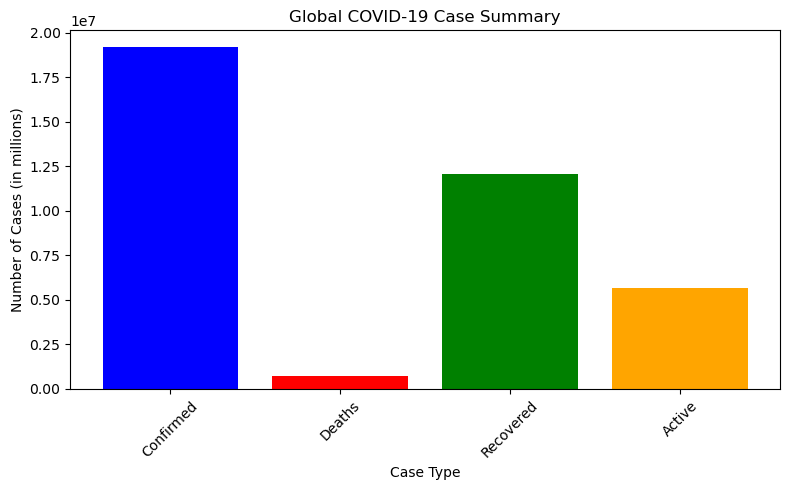

{'Confirmed': np.int64(19169166),
 'Deaths': np.float64(713007.0),
 'Recovered': np.float64(12070191.0),
 'Active': np.float64(5671187.0)}

In [5]:
totals = {
    "Confirmed": total_confirmed,
    "Deaths": total_deaths,
    "Recovered": total_recovered,
    "Active": total_active
}

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(totals.keys(), totals.values(), color=['blue', 'red', 'green', 'orange'])
plt.title("Global COVID-19 Case Summary")
plt.ylabel("Number of Cases (in millions)")
plt.xlabel("Case Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

totals

### **The correlation between population, death cases, recovered case, active case and critical, serious case. Give insights into the relationship between the number of cases and deaths with the population of the country.** 
- By answering this question, it helps us to understand the relationship between the population and total death cases, total recovered cases, total actived cases and critial, serious case. This information is useful for the to gain insigns about any feature affect the number of cases in that country.
- Answer this question by calculating the correlation matrix between population, cases and deaths. Then, we will plot the correlation matrix using a heatmap.

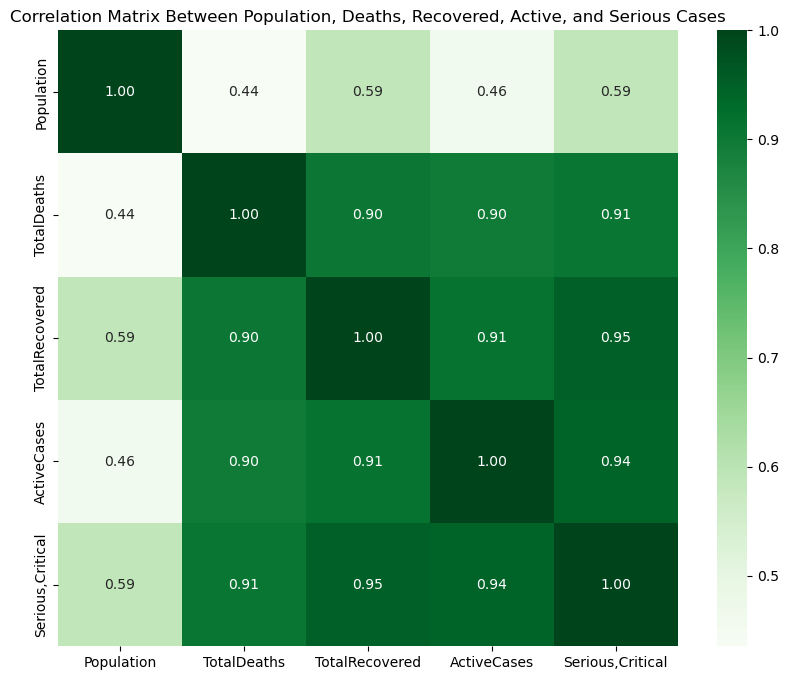

,Population,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical"
Population,1.000000,0.435269,0.589550,0.458732,0.588562
TotalDeaths,0.435269,1.000000,0.903282,0.897461,0.909095
TotalRecovered,0.589550,0.903282,1.000000,0.914581,0.949477
ActiveCases,0.458732,0.897461,0.914581,1.000000,0.944925
"Serious,Critical",0.588562,0.909095,0.949477,0.944925,1.000000


In [6]:
# Select the relevant columns for correlation
used_col = ['Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical']
correlation_data = world_df[used_col]
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Matrix Between Population, Deaths, Recovered, Active, and Serious Cases")
plt.show()

correlation_matrix


### **What are the top 10 countries with the lowest number of deaths/recovered/actived cases?** 
- Answer this question provides the top 10 countries with the lowest number of case (death, recoverd, active) and by these results, we can see the countries that have the best control of the pandemic and gain some insights into find the least affected regions.
- To answer this question, we will use `worldometer_data` and sort the values in ascending order. Then, we will display the top 10 countries with the lowest number of deaths, recovered, and active cases.



### **What are the top 10 countries with the highest number of deaths/recovered/actived cases?** 
- Answer this question provides the top 10 countries with the highest number of cases (death, recoverd, active) and by these results, we can see the countries that have the best control of the pandemic and gain some insights into find the most affected regions.
- To answer this question, we will use `worldometer_data` and sort the values in descending order. Then, we will display the top 10 countries with the highest number of deaths, recovered, and active cases.


<a id="analysis"></a>
## **Analysis**
<a id="q1"></a>

<a id="q2"></a>
### **Question 1.** Does the global trend over time for Confirmed/Deaths/Recovered cases evolve over time?
- Answer this question indicates the trend of the number of confirmed, deaths, and recovered cases over time: when it peaks, when it decreases, and when it increases in the time series.
- To answer this question, we will group `clean_complete_data` by `Date` and sum the values of `Confirmed`, `Deaths`, and `Recovered` columns. Then, we will plot the global trend over time for confirmed, deaths, and recovered cases using line charts.

In [7]:
# Find total confirmed/deaths/recovered/acive cases per day
total_per_day = covid_19_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
total_per_day.to_csv(r"cleaned_data/total_per_day.csv", index=False)
total_per_day.sample(5)

,Date,Confirmed,Deaths,Recovered,Active
105,2020-05-06,3761332,265327,1210894,2285111
111,2020-05-12,4263867,293155,1452191,2518521
86,2020-04-17,2250439,157481,554287,1538671
41,2020-03-03,92241,3154,46681,42406
8,2020-01-30,8234,171,141,7922


<a id="q6"></a>
### **Question 2.** How the world respond to the COVID-19 pandemic?
- Answer this question indicates the response of the wolrd separated by continents to the COVID-19 pandemic in different aspects: how pandemic hit these countries, effectiveness of epidemic control by testing and the recovery rate.
- To answer this question, first, we will extract and summarize the relevant data for each continent in the world. To analyze how the pandemic hit them, we will plot the rate of "Death", "Serious,Critical" and "Recovered" cases by 1M population in these continents. To analyze the effectiveness of epidemic control by testing, we will plot the rate of "Tests/1M pop" in these continents.

A person infected with COVID-19 may not experience any symptoms and, without knowing it, can transmit the virus to others. Carrying out the test is a better way of knowing one’s status. Most people tested negative, while the majority tested positive.

Testing for COVID-19 is crucial in controlling the pandemic as it helps identify and isolate infected individuals, thereby preventing further transmission. By detecting cases early, health authorities can implement targeted interventions and manage outbreaks more effectively. A high testing rate reflects a country’s commitment to monitoring the virus's spread, enabling timely data collection to inform public health strategies. Ultimately, increased testing is an active measure that empowers governments and communities to make informed decisions, assess the effectiveness of control measures, and adapt their responses based on real-time information about the pandemic's status.

     Country/Region      Continent  Population  TotalTests  Tests/1M pop
0        Luxembourg         Europe    626952.0    623994.0      995282.0
1            Monaco         Europe     39270.0     38209.0      972982.0
2    Faeroe Islands         Europe     48882.0     43045.0      880590.0
3         Gibraltar         Europe     33690.0     23063.0      684565.0
4               UAE           Asia   9902079.0   5262658.0      531470.0
5  Falkland Islands  South America      3489.0      1816.0      520493.0
6           Bahrain           Asia   1706669.0    876700.0      513691.0
7    Cayman Islands  North America     65798.0     31108.0      472780.0
8           Iceland         Europe    341465.0    149693.0      438385.0
9           Bermuda  North America     62254.0     26352.0      423298.0
           Continent  TotalTests    Population   Tests/1M pop
0                  0         0.0  0.000000e+00            NaN
1             Africa   8673853.0  1.343515e+09    6456.087087
2          

/tmp/ipykernel_1032/2031483215.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tests/1M pop', y='Continent', data=continent_summary, palette='viridis')


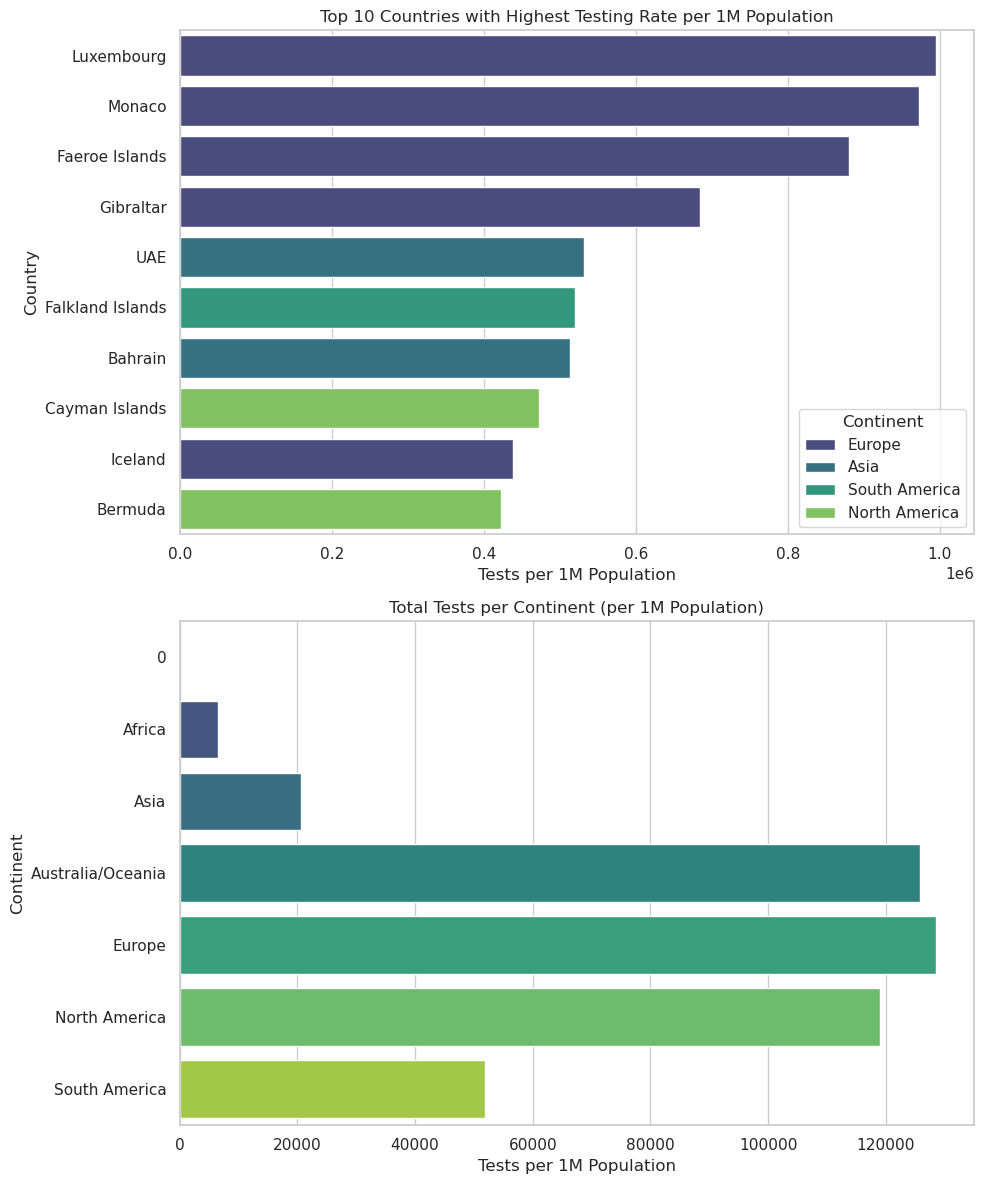

In [20]:
# Get top 10 countries with the highest testing rate per 1M population
top_10_testing_rate = world_df.nlargest(10, 'Tests/1M pop').reset_index(drop=True)

# Calculate total tests and total population for each continent
continent_summary = world_df.groupby('Continent')[['Population', 'TotalTests']].sum().reset_index()

# Calculate testing rate per 1M population for each continent
continent_summary['Tests/1M pop'] = continent_summary['TotalTests'] / continent_summary['Population'] * 1000000

# Display the results
print(top_10_testing_rate[['Country/Region', 'Continent', 'Population', 'TotalTests', 'Tests/1M pop']])
print(continent_summary[['Continent', 'TotalTests', 'Population', 'Tests/1M pop']])

# Plot the data
plt.figure(figsize=(10, 12))

# Plot 1: Top 10 countries with the highest testing rate per 1M population
plt.subplot(2, 1, 1)
sns.barplot(x='Tests/1M pop', y='Country/Region', hue='Continent', data=top_10_testing_rate, palette='viridis')
plt.title('Top 10 Countries with Highest Testing Rate per 1M Population')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Country')

# Plot 2: Total tests per continent (per 1M population)
plt.subplot(2, 1, 2)
sns.barplot(x='Tests/1M pop', y='Continent', data=continent_summary, palette='viridis')
plt.title('Total Tests per Continent (per 1M Population)')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Continent')

plt.tight_layout()
plt.show()

<a id="q6"></a>
### **Question 3.** Status recorded cases of COVID - 19 with the world of countries during the period